In [400]:
import numpy as np
import scipy as sp
from numpy import linalg as LA
import matplotlib.pylab as plt
import random
from sympy import *
init_printing(use_latex=True)
from numpy import diff

In [401]:
# Main parameters
Eh = 27.2114			# in Hartree
w0 = 0.7			# external light frequency

In [402]:
data1 = np.loadtxt('energy_ground_exc.txt')

In [403]:
T = 20
S_exc_0 = []     #excited state
S_gr_1 = []      #ground state + light mode
for i in range(0,T,1):
    S_exc_0.append(data1[i,1]*Eh+data1[i,2])
    S_gr_1.append(data1[i,1]*Eh+w0)

In [404]:
#fitting the functions
app1 = np.polyfit(data1[:,0]/100,S_exc_0,5)
f1 = np.poly1d(app1)
app2 = np.polyfit(data1[:,0]/100,S_gr_1,5)
f2 = np.poly1d(app2)
app3 = np.polyfit(data1[:,0]/100,data1[:,1]*Eh,5)
f3 = np.poly1d(app3)

x = np.arange(0.95,1.71,0.01)

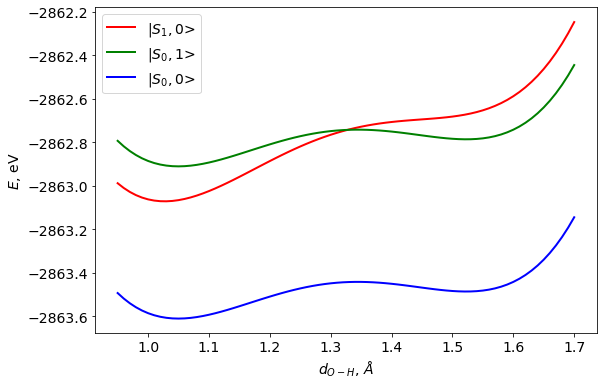

In [405]:
fig = plt.figure(figsize=(6*1.5, 4*1.5))
plt.plot(x,f1(x), 'r', linewidth=2, label='|$S_{1},0$>')
plt.plot(x,f2(x), 'g', linewidth=2, label='|$S_{0},1$>')
plt.plot(x,f3(x), 'b', linewidth=2, label='|$S_{0},0$>')
plt.ylabel('$E$, eV', fontsize=14)
plt.xlabel('$d_{O-H}$, $\AA$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

In [406]:
# Diagonalization of the Hamiltonian
UP = []
LP = []
g = 0.01    #coupling strength
for i in range (950,1710,10):
    H = np.eye(2)
    H[0,0] *= f1(i/1000)
    H[1,1] *= f2(i/1000)
    H[0,1]=g
    H[1,0]=g 
    w, v = LA.eig(H)
    UP.append(max(w))
    LP.append(min(w))

<function print>

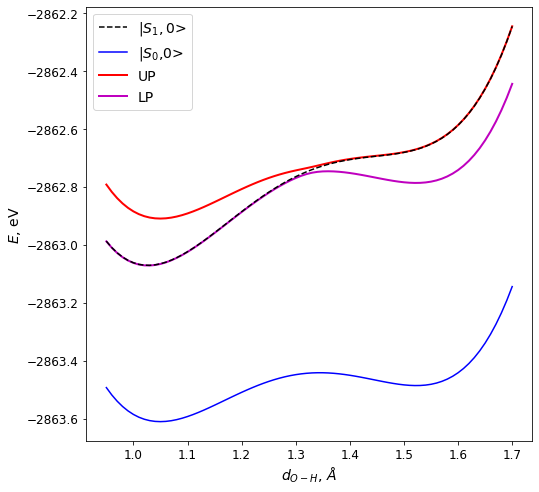

In [407]:
plt.figure(figsize=(8,8))
plt.plot(x, f1(x), 'k--', linewidth=1.5, label='|$S_{1},0$>', zorder=4)
plt.plot(x, f3(x), 'b', linewidth=1.5, label='|$S_{0}$,0>')
plt.plot(x, UP, 'r', linewidth=2, label='UP')
plt.plot(x, LP, 'm', linewidth=2, label='LP')
plt.ylabel('$E$, eV', fontsize=14)
plt.xlabel('$d_{O-H}$, $\AA$', fontsize=14)
#plt.xlim([0,5000])
#plt.ylim([2.7,4.1])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ticklabel_format(axis='y',style='plain',useOffset=False)
plt.legend(fontsize=14)
print

In [408]:
dif_LP = diff(LP)/diff(x)

In [409]:
delta = 10
for i in range (0,76,1):
    if (UP[i]-LP[i]) < delta:
        delta = UP[i]-LP[i]
print(delta)

0.0200543196219769
